In [1]:
# Steven Zajac-Descôteaux

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1: Face Recognition, but not evil this time

Using the faces dataset in:

```
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
```

If you use the `faces.target` and `faces.target_names` attributes, you can build a facial recognition algorithm.

Use sklearn **gridsearch** (or an equivalent, like random search) to optimize the model for accuracy. Try both a SVM-based classifier and a logistic regression based classifier (with a feature pipeline of your choice) to get the best model. You should have at least 80% accuracy.

In [13]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)

In [14]:
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, Normalizer

In [4]:
######  Logsistic  ######

In [5]:
#Use one liner

#labels = []
#for i in y:
#    labels.append(faces.target_names[i])

In [6]:
X = faces.data
y = faces.target
labels = [faces.target_names[i] for i in y] #Target names - if needed

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
pipe = make_pipeline(StandardScaler(),PCA(),LogisticRegression())
#Make pipe assigns name. Print pipeline to view attributed name

In [9]:
param_grid = {'pca__whiten':[True,False],
              'pca__n_components':[775,800],
              'logisticregression__fit_intercept':[True,False],
              'logisticregression__C':[0.18,0.2,0.25]} #C values mean different things. Check documentation!

In [90]:
grid = GridSearchCV(pipe,param_grid,verbose=2) #Verbose shows us what's going on

In [91]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False, total=   0.3s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False, total=   0.3s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False, total=   0.3s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False, total=   0.3s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True 
[CV]  logisticregres

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False, total=   0.3s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True 
[CV]  logisticregre

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False, total=   0.3s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False, total=   0.3s
[CV] logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.18, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.2, 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False, total=   0.3s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.2, lo

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False, total=   0.3s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False, total=   0.3s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.2, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=True, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True 
[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True, total=   0.3s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=True 
[CV]  logisticregres

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False, total=   0.3s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False, total=   0.3s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=775, pca__whiten=False, total=   0.3s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True 
[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True, total=   0.2s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=True 
[CV]  logisticregre

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False, total=   0.3s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False, total=   0.4s
[CV] logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   37.2s finished


[CV]  logisticregression__C=0.25, logisticregression__fit_intercept=False, pca__n_components=800, pca__whiten=False, total=   0.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.18, 0.2, 0.25],
                         'logisticregression__fit_intercept': [True, False],
                         'pca__n_components': [775, 800],
                         'pca__whiten': [True, False]},
             verbose=2)

In [92]:
grid.best_params_ #Returns the best params

{'logisticregression__C': 0.2,
 'logisticregression__fit_intercept': True,
 'pca__n_components': 775,
 'pca__whiten': False}

In [93]:
log_model = grid.best_estimator_ # Creates model with best params

In [94]:
log_model.score(X_test,y_test) #Accuracy bc default in model -- check 

0.8516320474777448

In [ ]:
##########   SVM - Based   ###############

In [95]:
X = faces.data
y = faces.target
labels = [faces.target_names[i] for i in y]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [97]:
pipe_SVC = make_pipeline(StandardScaler(),PCA(),SVC())

In [98]:
param_grid_SVC = {'pca__whiten':[True],
              'pca__n_components':[74,75],
              'svc__C':[4,3],
              'svc__kernel':['rbf'],
              'svc__gamma':[0.009,0.01]}
# Play around with params. Trial & error. 
# Only use linear kernel for linear data. Not linear in this case

In [99]:
grid_SVC = GridSearchCV(pipe_SVC,param_grid_SVC,verbose=4)

In [100]:
grid_SVC.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] pca__n_components=74, pca__whiten=True, svc__C=4, svc__gamma=0.009, svc__kernel=rbf 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  pca__n_components=74, pca__whiten=True, svc__C=4, svc__gamma=0.009, svc__kernel=rbf, score=0.852, total=   0.3s
[CV] pca__n_components=74, pca__whiten=True, svc__C=4, svc__gamma=0.009, svc__kernel=rbf 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  pca__n_components=74, pca__whiten=True, svc__C=4, svc__gamma=0.009, svc__kernel=rbf, score=0.861, total=   0.2s
[CV] pca__n_components=74, pca__whiten=True, svc__C=4, svc__gamma=0.009, svc__kernel=rbf 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  pca__n_components=74, pca__whiten=True, svc__C=4, svc__gamma=0.009, svc__kernel=rbf, score=0.851, total=   0.2s
[CV] pca__n_components=74, pca__whiten=True, svc__C=4, svc__gamma=0.009, svc__kernel=rbf 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV]  pca__n_components=74, pca__whiten=True, svc__C=4, svc__gamma=0.009, svc__kernel=rbf, score=0.842, total=   0.2s
[CV] pca__n_components=74, pca__whiten=True, svc__C=4, svc__gamma=0.009, svc__kernel=rbf 
[CV]  pca__n_components=74, pca__whiten=True, svc__C=4, svc__gamma=0.009, svc__kernel=rbf, score=0.822, total=   0.2s
[CV] pca__n_components=74, pca__whiten=True, svc__C=4, svc__gamma=0.01, svc__kernel=rbf 
[CV]  pca__n_components=74, pca__whiten=True, svc__C=4, svc__gamma=0.01, svc__kernel=rbf, score=0.847, total=   0.2s
[CV] pca__n_components=74, pca__whiten=True, svc__C=4, svc__gamma=0.01, svc__kernel=rbf 
[CV]  pca__n_components=74, pca__whiten=True, svc__C=4, svc__gamma=0.01, svc__kernel=rbf, score=0.866, total=   0.2s
[CV] pca__n_components=74, pca__whiten=True, svc__C=4, svc__gamma=0.01, svc__kernel=rbf 
[CV]  pca__n_components=74, pca__whiten=True, svc__C=4, svc__gamma=0.01, svc__kernel=rbf, score=0.861, total=   0.2s
[CV] pca__n_components=74, pca__whiten=True, svc__C=4, s

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    9.5s finished


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': [74, 75], 'pca__whiten': [True],
                         'svc__C': [4, 3], 'svc__gamma': [0.009, 0.01],
                         'svc__kernel': ['rbf']},
             verbose=4)

In [101]:
grid_SVC.best_params_

{'pca__n_components': 74,
 'pca__whiten': True,
 'svc__C': 3,
 'svc__gamma': 0.009,
 'svc__kernel': 'rbf'}

In [102]:
best_SVC = grid_SVC.best_estimator_

In [103]:
best_SVC.score(X_test,y_test) #Since accuracy is default score param. Returns accuracy 

0.887240356083086

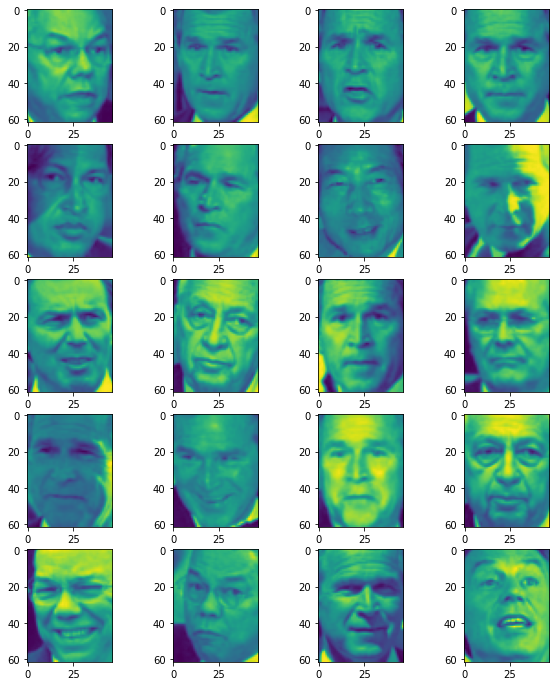

In [24]:
##### misc code for me #####

fig, ax = plt.subplots(ncols=4,nrows=5,figsize=(10,12))
i = 0

for r in range(5):
    for c in range(4):
        ax[r,c].imshow(faces.images[i])
        i += 1

# 2: Bag of Words, Bag of Popcorn

By this point, you are ready for the [Bag of Words, Bag of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data) competition. 

Use NLP feature pre-processing (using, SKLearn, Gensim, Spacy or Hugginface) to build the best classifier you can. Use a  feature pipeline, and gridsearch for your final model.

A succesful project should get 90% or more on a **holdout** dataset you kept for yourself.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import nltk
from nltk import PorterStemmer
from nltk import WordNetLemmatizer

In [74]:
### Logistic Regression - Suprisingly good score ###

In [75]:
train_df = pd.read_csv('../5-1-predictive-modelling-main/labeledTrainData.tsv',delimiter='\t',
                 header=0,quoting=3)

In [76]:
stemmer = PorterStemmer()
lemma = WordNetLemmatizer()

In [77]:
def review_to_words(raw_review):
    """
    Converst a raw review to a string of words
    The input is a single string (a raw movie review)
    The output is a single string (a processed movie review)
    """
    
    #1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text()
    
    #2. Remove non-letters: regex
    #Regex [] = group, ^:not these, a-zA-Z letters, replace with whitespace
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    #3. Convert to lowecase & split into individual words
    words = letters_only.lower().split()
    
    #4. Kaggle says: In Python, searching a set is much faster than searching a list
    # thus convert stopword list to set. Assume bc no indexing within a set +
    stops = set(stopwords.words("english"))
    
    #5. Remove stop words
    meaningful_words = [w for w in words if not w in stops] 
    
    #stem_words = [stemmer.stem(w) for w in meaningful_words]
    
    lem_words = [lemma.lemmatize(w) for w in meaningful_words]
   
    #6. join the words back into one string separated by space & return the results
    return (" ".join(lem_words))

In [78]:
#Get the number of reviews based on the df col size
num_reviews = train_df['review'].size

#Loop over each rev.--create an index i from 0 to len(movie_review_list)
print("Cleaning & parsing the training set movie reviews...")

#Initialize an empty list to hold the clean reviews
clean_train_revs = []

for i in range(num_reviews):
    #Call func for each one & add res to clean_train_revs
    clean_train_revs.append(review_to_words(train_df['review'][i]))

Cleaning & parsing the training set movie reviews...


In [79]:
#appends clean review to df 

train_df['clean_review'] = 0

for k in range(len(clean_train_revs)):
    train_df['clean_review'].iloc[k] = clean_train_revs[k]
train_df

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,id,sentiment,review,clean_review
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",stuff going moment mj started listening music ...
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",classic war world timothy hines entertaining f...
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",film start manager nicholas bell giving welcom...
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",must assumed praised film greatest filmed oper...
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...",superbly trashy wondrously unpretentious explo...
...,...,...,...,...
24995,"""3453_3""",0,"""It seems like more consideration has gone int...",seems like consideration gone imdb review film...
24996,"""5064_1""",0,"""I don't believe they made this film. Complete...",believe made film completely unnecessary first...
24997,"""10905_3""",0,"""Guy is a loser. Can't get girls, needs to bui...",guy loser get girl need build picked stronger ...
24998,"""10194_3""",0,"""This 30 minute documentary Buñuel made in the...",minute documentary bu uel made early one spain...


In [80]:
print('Training the logstic model...')

#Fit the forest to the training set--using bag of words as features and the sentiment as response (y)
X = train_df['clean_review']
y = train_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Training the logstic model...


In [81]:
print('Creating the bag of words...') #### Gensim? 

from sklearn.feature_extraction.text import CountVectorizer

#Initializer 'CountVectorizer' object--scikit-learn's bag of word tool


vectorizer = CountVectorizer(tokenizer=None,
                             preprocessor=None,
                             stop_words='english',
                             max_features=7500,
                             binary=True,
                             ngram_range=(1,3))


# fit_transform() review:
#1. fits model and learns the vocabulary
#2. transforms the training data into feature vectors. 
#The input to fit_transform() should be a list of strings
train_data_feats = vectorizer.fit_transform(X_train)
test_data_feats = vectorizer.transform(X_test)

# np arrays are easy to work with--convert results into array

train_data_feats = train_data_feats.toarray()
test_data_feats = test_data_feats.toarray()

Creating the bag of words...


In [82]:
pipe = make_pipeline(StandardScaler(),PCA(),LogisticRegression())

In [89]:
param_grid = {'pca__n_components':[775,800,850,900], #475
              'logisticregression__C':[.0007,.0009,.00095],
              } #C values mean different things. Check documentation!

In [90]:
log_grid = GridSearchCV(pipe,param_grid,verbose=10) #Verbose shows us what's going on

In [91]:
log_grid.fit(train_data_feats,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] logisticregression__C=0.0007, pca__n_components=775 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  logisticregression__C=0.0007, pca__n_components=775, score=0.871, total=  22.1s
[CV] logisticregression__C=0.0007, pca__n_components=775 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.2s remaining:    0.0s


[CV]  logisticregression__C=0.0007, pca__n_components=775, score=0.883, total=  20.2s
[CV] logisticregression__C=0.0007, pca__n_components=775 .............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   42.5s remaining:    0.0s


[CV]  logisticregression__C=0.0007, pca__n_components=775, score=0.877, total=  19.0s
[CV] logisticregression__C=0.0007, pca__n_components=775 .............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min remaining:    0.0s


[CV]  logisticregression__C=0.0007, pca__n_components=775, score=0.880, total=  19.2s
[CV] logisticregression__C=0.0007, pca__n_components=775 .............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


[CV]  logisticregression__C=0.0007, pca__n_components=775, score=0.871, total=  18.8s
[CV] logisticregression__C=0.0007, pca__n_components=800 .............


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min remaining:    0.0s


[CV]  logisticregression__C=0.0007, pca__n_components=800, score=0.875, total=  18.7s
[CV] logisticregression__C=0.0007, pca__n_components=800 .............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.0min remaining:    0.0s


[CV]  logisticregression__C=0.0007, pca__n_components=800, score=0.886, total=  19.6s
[CV] logisticregression__C=0.0007, pca__n_components=800 .............


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.3min remaining:    0.0s


[CV]  logisticregression__C=0.0007, pca__n_components=800, score=0.882, total=  18.7s
[CV] logisticregression__C=0.0007, pca__n_components=800 .............


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.6min remaining:    0.0s


[CV]  logisticregression__C=0.0007, pca__n_components=800, score=0.876, total=  18.8s
[CV] logisticregression__C=0.0007, pca__n_components=800 .............


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.9min remaining:    0.0s


[CV]  logisticregression__C=0.0007, pca__n_components=800, score=0.878, total=  18.8s
[CV] logisticregression__C=0.0007, pca__n_components=850 .............
[CV]  logisticregression__C=0.0007, pca__n_components=850, score=0.872, total=  19.3s
[CV] logisticregression__C=0.0007, pca__n_components=850 .............
[CV]  logisticregression__C=0.0007, pca__n_components=850, score=0.880, total=  19.8s
[CV] logisticregression__C=0.0007, pca__n_components=850 .............
[CV]  logisticregression__C=0.0007, pca__n_components=850, score=0.880, total=  19.1s
[CV] logisticregression__C=0.0007, pca__n_components=850 .............
[CV]  logisticregression__C=0.0007, pca__n_components=850, score=0.880, total=  19.3s
[CV] logisticregression__C=0.0007, pca__n_components=850 .............
[CV]  logisticregression__C=0.0007, pca__n_components=850, score=0.875, total=  19.1s
[CV] logisticregression__C=0.0007, pca__n_components=900 .............
[CV]  logisticregression__C=0.0007, pca__n_components=900,

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 20.1min finished


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.0007, 0.0009, 0.00095],
                         'pca__n_components': [775, 800, 850, 900]},
             verbose=10)

In [92]:
log_grid.best_params_ #Returns the best params

{'logisticregression__C': 0.0007, 'pca__n_components': 800}

In [93]:
log_model = log_grid.best_estimator_ # Creates model with best params

In [94]:
log_model.score(test_data_feats,y_test) #Best accuracy I could get without giving myself a burn out

0.88112

In [ ]:
### BEST RESULT ### (previous run)

In [172]:
log_model.score(test_data_feats,y_test) #Best accuracy I could get without giving myself a burn out

0.8912

In [136]:
best_results = np.round(log_model.score(test_data_feats,y_test),1)
best_results # LOL 

0.9

In [ ]:
### Linear SVC ###

In [43]:
train_df = pd.read_csv('../5-1-predictive-modelling-main/labeledTrainData.tsv',delimiter='\t',
                 header=0,quoting=3)

In [44]:
stemmer = PorterStemmer()
lemma = WordNetLemmatizer()

In [45]:
def review_to_words(raw_review):
    """
    Converst a raw review to a string of words
    The input is a single string (a raw movie review)
    The output is a single string (a processed movie review)
    """
    
    #1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text()
    
    #2. Remove non-letters: regex
    #Regex [] = group, ^:not these, a-zA-Z letters, replace with whitespace
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    #3. Convert to lowecase & split into individual words
    words = letters_only.lower().split()
    
    #4. Kaggle says: In Python, searching a set is much faster than searching a list
    # thus convert stopword list to set. Assume bc no indexing within a set +
    stops = set(stopwords.words("english"))
    
    #5. Remove stop words
    meaningful_words = [w for w in words if not w in stops] 
    
    #stem_words = [stemmer.stem(w) for w in meaningful_words]
    
    lem_words = [lemma.lemmatize(w) for w in meaningful_words]
   
    #6. join the words back into one string separated by space & return the results
    return (" ".join(lem_words))

In [46]:
#Get the number of reviews based on the df col size
num_reviews = train_df['review'].size

#Loop over each rev.--create an index i from 0 to len(movie_review_list)
print("Cleaning & parsing the training set movie reviews...")

#Initialize an empty list to hold the clean reviews
clean_train_revs = []

for i in range(num_reviews):
    #Call func for each one & add res to clean_train_revs
    clean_train_revs.append(review_to_words(train_df['review'][i]))

Cleaning & parsing the training set movie reviews...


In [47]:
#appends clean review to df 

train_df['clean_review'] = 0

for k in range(len(clean_train_revs)):
    train_df['clean_review'].iloc[k] = clean_train_revs[k]
train_df

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,id,sentiment,review,clean_review
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",stuff going moment mj started listening music ...
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",classic war world timothy hines entertaining f...
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",film start manager nicholas bell giving welcom...
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",must assumed praised film greatest filmed oper...
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...",superbly trashy wondrously unpretentious explo...
...,...,...,...,...
24995,"""3453_3""",0,"""It seems like more consideration has gone int...",seems like consideration gone imdb review film...
24996,"""5064_1""",0,"""I don't believe they made this film. Complete...",believe made film completely unnecessary first...
24997,"""10905_3""",0,"""Guy is a loser. Can't get girls, needs to bui...",guy loser get girl need build picked stronger ...
24998,"""10194_3""",0,"""This 30 minute documentary Buñuel made in the...",minute documentary bu uel made early one spain...


In [75]:
print('Training the logstic model...')

#Fit the forest to the training set--using bag of words as features and the sentiment as response (y)
X = train_df['clean_review']
y = train_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=26)

Training the logstic model...


In [76]:
print('Creating the bag of words...') #### Gensim? 

from sklearn.feature_extraction.text import CountVectorizer

#Initializer 'CountVectorizer' object--scikit-learn's bag of word tool

vectorizer = CountVectorizer(tokenizer=None,
                             preprocessor=None,
                             stop_words=None,
                             max_features=10000,
                             binary=True,
                             ngram_range=(1,2))


# fit_transform() review:
#1. fits model and learns the vocabulary
#2. transforms the training data into feature vectors. 
#The input to fit_transform() should be a list of strings
train_data_feats = vectorizer.fit_transform(X_train)
test_data_feats = vectorizer.transform(X_test)

# np arrays are easy to work with--convert results into array

train_data_feats = train_data_feats.toarray()
test_data_feats = test_data_feats.toarray()

Creating the bag of words...


In [77]:
pipe = make_pipeline(StandardScaler(),PCA(),LinearSVC())
pipe

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearsvc', LinearSVC())])

In [78]:
param_grid = {'pca__n_components':[450,550], #475
              'linearsvc__C':[.01],
              } #C values mean different things. Check documentation!

In [79]:
svm_grid = GridSearchCV(pipe,param_grid,verbose=10) #Verbose shows us what's going on

In [80]:
svm_grid.fit(train_data_feats,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] linearsvc__C=0.01, pca__n_components=450 ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  linearsvc__C=0.01, pca__n_components=450, score=0.880, total=  40.9s
[CV] linearsvc__C=0.01, pca__n_components=450 ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.0s remaining:    0.0s
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  linearsvc__C=0.01, pca__n_components=450, score=0.885, total=  44.5s
[CV] linearsvc__C=0.01, pca__n_components=450 ........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.4min remaining:    0.0s
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  linearsvc__C=0.01, pca__n_components=450, score=0.885, total=  39.8s
[CV] linearsvc__C=0.01, pca__n_components=450 ........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.1min remaining:    0.0s
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  linearsvc__C=0.01, pca__n_components=450, score=0.883, total=  39.3s
[CV] linearsvc__C=0.01, pca__n_components=450 ........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.7min remaining:    0.0s
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  linearsvc__C=0.01, pca__n_components=450, score=0.891, total=  39.8s
[CV] linearsvc__C=0.01, pca__n_components=550 ........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.4min remaining:    0.0s
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  linearsvc__C=0.01, pca__n_components=550, score=0.883, total=  45.4s
[CV] linearsvc__C=0.01, pca__n_components=550 ........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  4.2min remaining:    0.0s
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  linearsvc__C=0.01, pca__n_components=550, score=0.882, total=  48.8s
[CV] linearsvc__C=0.01, pca__n_components=550 ........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  5.0min remaining:    0.0s
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  linearsvc__C=0.01, pca__n_components=550, score=0.880, total=  45.1s
[CV] linearsvc__C=0.01, pca__n_components=550 ........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  5.7min remaining:    0.0s
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  linearsvc__C=0.01, pca__n_components=550, score=0.882, total=  46.2s
[CV] linearsvc__C=0.01, pca__n_components=550 ........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  6.5min remaining:    0.0s
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  linearsvc__C=0.01, pca__n_components=550, score=0.890, total=  45.3s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  7.3min finished
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('linearsvc', LinearSVC())]),
             param_grid={'linearsvc__C': [0.01],
                         'pca__n_components': [450, 550]},
             verbose=10)

In [81]:
svm_grid.best_params_ #Returns the best params

{'linearsvc__C': 0.01, 'pca__n_components': 450}

In [82]:
svm_model = svm_grid.best_estimator_ # Creates model with best params

In [83]:
svm_model.score(test_data_feats,y_test) #Best accuracy I could get without giving myself a burn out

0.8768

In [ ]:
#### Random Forests ####

In [271]:
train_df = pd.read_csv('../5-1-predictive-modelling-main/labeledTrainData.tsv',delimiter='\t',
                 header=0,quoting=3)

In [272]:
def review_to_words(raw_review):
    """
    Converst a raw review to a string of words
    The input is a single string (a raw movie review)
    The output is a single string (a processed movie review)
    """
    
    #1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text()
    
    #2. Remove non-letters: regex
    #Regex [] = group, ^:not these, a-zA-Z letters, replace with whitespace
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    #3. Convert to lowecase & split into individual words
    words = letters_only.lower().split()
    
    #4. Kaggle says: In Python, searching a set is much faster than searching a list
    # thus convert stopword list to set. Assume bc no indexing within a set +
    stops = set(stopwords.words("english"))
    
    #5. Remove stop words
    meaningful_words = [w for w in words if not w in stops] 
    
    stem_words = [stemmer.stem(w) for w in meaningful_words]
    
    #lem_words = [lemma.lemmatize(w) for w in meaningful_words]
   
    #6. join the words back into one string separated by space & return the results
    return (" ".join(stem_words))

In [273]:
#Get the number of reviews based on the df col size
num_reviews = train_df['review'].size

#Loop over each rev.--create an index i from 0 to len(movie_review_list)
print("Cleaning & parsing the training set movie reviews...")

#Initialize an empty list to hold the clean reviews
clean_train_revs = []

for i in range(num_reviews):
    #Call func for each one & add res to clean_train_revs
    clean_train_revs.append(review_to_words(train_df['review'][i]))

Cleaning & parsing the training set movie reviews...


In [274]:
#appends clean review to df 

train_df['clean_review'] = 0

for k in range(len(clean_train_revs)):
    train_df['clean_review'].iloc[k] = clean_train_revs[k]
    
train_df

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,id,sentiment,review,clean_review
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",stuff go moment mj start listen music watch od...
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",classic war world timothi hine entertain film ...
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",film start manag nichola bell give welcom inve...
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",must assum prais film greatest film opera ever...
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...",superbl trashi wondrous unpretenti exploit hoo...
...,...,...,...,...
24995,"""3453_3""",0,"""It seems like more consideration has gone int...",seem like consider gone imdb review film went ...
24996,"""5064_1""",0,"""I don't believe they made this film. Complete...",believ made film complet unnecessari first fil...
24997,"""10905_3""",0,"""Guy is a loser. Can't get girls, needs to bui...",guy loser get girl need build pick stronger su...
24998,"""10194_3""",0,"""This 30 minute documentary Buñuel made in the...",minut documentari bu uel made earli one spain ...


In [275]:
print('Training the random forest...')

#Fit the forest to the training set--using bag of words as features and the sentiment as response (y)
X = train_df['clean_review']
y = train_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=26)

Training the random forest...


In [276]:
print('Creating the bag of words...') #### Gensim? - next time

from sklearn.feature_extraction.text import CountVectorizer

#Initializer 'CountVectorizer' object--scikit-learn's bag of word tool


#vectorizer = CountVectorizer(stop_words=None,
#                             max_features=5000,
#                             binary=True,
#                             ngram_range=(1,2))

vectorizer = CountVectorizer(tokenizer=None,
                             preprocessor=None,
                             stop_words=None,
                             max_features=5000,
                             binary=True,
                             ngram_range=(1,2))

# fit_transform() review:
#1. fits model and learns the vocabulary
#2. transforms the training data into feature vectors. 
#The input to fit_transform() should be a list of strings
train_data_feats = vectorizer.fit_transform(X_train)
test_data_feats = vectorizer.transform(X_test)

# np arrays are easy to work with--convert results into array

train_data_feats = train_data_feats.toarray()
test_data_feats = test_data_feats.toarray()

Creating the bag of words...


In [277]:
pipe = make_pipeline(StandardScaler(),PCA(),RandomForestClassifier())
pipe

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('randomforestclassifier', RandomForestClassifier())])

In [278]:
#100 then 150 , 500

In [279]:
param_grid = {'pca__n_components':[150,250],
              'randomforestclassifier__n_estimators':[275,400]
              }

In [280]:
grid = GridSearchCV(pipe,param_grid,verbose=10)

In [281]:
print('Training the random forest...')
grid.fit(train_data_feats,y_train)


Training the random forest...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] pca__n_components=75, randomforestclassifier__n_estimators=350 ..


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  pca__n_components=75, randomforestclassifier__n_estimators=350, score=0.838, total=  44.9s
[CV] pca__n_components=75, randomforestclassifier__n_estimators=350 ..


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.0s remaining:    0.0s


[CV]  pca__n_components=75, randomforestclassifier__n_estimators=350, score=0.837, total=  42.0s
[CV] pca__n_components=75, randomforestclassifier__n_estimators=350 ..


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV]  pca__n_components=75, randomforestclassifier__n_estimators=350, score=0.846, total=  40.8s
[CV] pca__n_components=75, randomforestclassifier__n_estimators=350 ..


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.1min remaining:    0.0s


[CV]  pca__n_components=75, randomforestclassifier__n_estimators=350, score=0.841, total=  41.7s
[CV] pca__n_components=75, randomforestclassifier__n_estimators=350 ..


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.8min remaining:    0.0s


[CV]  pca__n_components=75, randomforestclassifier__n_estimators=350, score=0.844, total=  50.1s
[CV] pca__n_components=75, randomforestclassifier__n_estimators=600 ..


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.7min remaining:    0.0s


[CV]  pca__n_components=75, randomforestclassifier__n_estimators=600, score=0.839, total= 1.2min
[CV] pca__n_components=75, randomforestclassifier__n_estimators=600 ..


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  4.9min remaining:    0.0s


[CV]  pca__n_components=75, randomforestclassifier__n_estimators=600, score=0.841, total= 1.1min
[CV] pca__n_components=75, randomforestclassifier__n_estimators=600 ..


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  6.1min remaining:    0.0s


[CV]  pca__n_components=75, randomforestclassifier__n_estimators=600, score=0.843, total= 1.2min
[CV] pca__n_components=75, randomforestclassifier__n_estimators=600 ..


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  7.3min remaining:    0.0s


[CV]  pca__n_components=75, randomforestclassifier__n_estimators=600, score=0.840, total= 1.2min
[CV] pca__n_components=75, randomforestclassifier__n_estimators=600 ..


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  8.5min remaining:    0.0s


[CV]  pca__n_components=75, randomforestclassifier__n_estimators=600, score=0.847, total= 1.3min
[CV] pca__n_components=150, randomforestclassifier__n_estimators=350 .
[CV]  pca__n_components=150, randomforestclassifier__n_estimators=350, score=0.837, total= 1.1min
[CV] pca__n_components=150, randomforestclassifier__n_estimators=350 .
[CV]  pca__n_components=150, randomforestclassifier__n_estimators=350, score=0.841, total= 1.1min
[CV] pca__n_components=150, randomforestclassifier__n_estimators=350 .
[CV]  pca__n_components=150, randomforestclassifier__n_estimators=350, score=0.849, total= 1.1min
[CV] pca__n_components=150, randomforestclassifier__n_estimators=350 .
[CV]  pca__n_components=150, randomforestclassifier__n_estimators=350, score=0.841, total= 1.2min
[CV] pca__n_components=150, randomforestclassifier__n_estimators=350 .
[CV]  pca__n_components=150, randomforestclassifier__n_estimators=350, score=0.850, total= 1.2min
[CV] pca__n_components=150, randomforestclassifier__n_esti

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 24.7min finished


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'pca__n_components': [75, 150],
                         'randomforestclassifier__n_estimators': [350, 600]},
             verbose=10)

In [283]:
grid.best_params_

{'pca__n_components': 150, 'randomforestclassifier__n_estimators': 350}

In [284]:
best_model = grid.best_estimator_

In [285]:
best_model.score(test_data_feats,y_test)

#Could have tweaked it but I don't have a second computer to run this code and logistic runs quicker and better score

0.8381333333333333

In [ ]:
#### Word-Vectors #### MISC STUFF

In [59]:
#Read from the files 
train = pd.read_csv('labeledTrainData.tsv',header=0,
                    sep='\t',quoting=3)

test = pd.read_csv('testData.tsv',header=0,
                   sep='\t', quoting=3)

unlabeled_train = pd.read_csv('unlabeledTrainData.tsv',header=0,
                              sep='\t',quoting=3)

#Verify the number of reviews that were read (100,000 in total)
print(f'\nread {train.review.size} labeled train reviews, {test.review.size} labeled test reviews,'
      f' and {unlabeled_train.review.size} unlabeled reviews')


read 25000 labeled train reviews, 25000 labeled test reviews, and 50000 unlabeled reviews


In [60]:
#Following clean up similar to part one EXCEPT
# no stop word r emoval--algo relies on broader context to produce high qual word vectors
# Will leave the param optional to user

from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def review_to_wordlist(review,remove_stopwords=False): 
    """
    Function to convert a doc to a sequence of words.
    Option to remove stop words. List of words returned
    """    
    #1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    
    #2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]", " ", review_text)
    
    #3. Convert words to lower case and split them
    words = review_text.lower().split()
    
    #4. Optionally remove stopword -- default is false
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    #5. Return a list of words
    return list(words)

In [61]:
#We want a specific input format-Word2Vec expects single sentences each as a list of words

#Download the punkt tokenizer for sentence splitting
import nltk.data
#nltk.download()

#Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

#Define a function to split a review into parsed sentences 

def review_to_sentences(review,tokenizer,remove_stopwords=False):
    """
    Function to split a review into parsed sentences.
    Returns a list of sentences where each sentence 
    is a list of words.
    """
    #1. Use NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(review.strip())
    
    #2. loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        #if a sentence is empty, skip it
        if len(raw_sentence) > 0:
            #Otherwise call review_to_wordlist to get a list of words
            sentences.append(review_to_wordlist(raw_sentence))
            
    #Return the list of sentences (each sentence is a list of words--returns a list of lists)
    return sentences 

In [62]:
sentences = [] #Initialize an empty list of sentences

print('Parsing sentences from training set')
for review in train['review']:
    sentences += review_to_sentences(review,tokenizer)
    
print('Parsing sentences from unlabled set')
for review in unlabeled_train['review']:
    sentences += review_to_sentences(review,tokenizer)

Parsing sentences from training set


/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:329: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:414: MarkupResemblesLocatorWarning: "http://www.happierabroad.com"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Parsing sentences from unlabled set


/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:414: MarkupResemblesLocatorWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:414: MarkupResemblesLocatorWarning: "http://www.loosechangeguide.com/LooseChangeGuide.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:414: MarkupResemblesLocatorWarning: "http://www.msnbc.msn.com/id/4972055/site/newsweek/"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL,

In [63]:
len(sentences)

795538

In [64]:
print(sentences[0])

['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'the', 'wiz', 'and', 'watched', 'moonwalker', 'again']


In [65]:
#Import logging module & configure it so that Word2Vec creates nicer output
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',
                    level=logging.INFO)

#Set values for various parameters
num_features = 300  #Word vector dimensionality
min_word_count = 40 #Minimum word count
num_workers = 4     #Number of threads to run in parallel
context = 10        #Context window size
downsampling = 1e-3 #Downsample setting for frequent words

#Initialize and train the model--longish
from gensim.models import word2vec

print('Training mode...')
model = word2vec.Word2Vec(sentences, workers=num_workers,
                          size=num_features, min_count=min_word_count,
                          window=context,sample=downsampling)

#If ypu don't plan to train model any further, calling init_sims will make the model much more memory efficient
model.init_sims(replace=True)

#It can be helpful to create a meaningful model name and save the model for later use
# Can load it later with Word2Vec.load()

model_name = '300features_40minwords_10context'
model.save(model_name)

2021-03-23 00:19:15,868 : INFO : collecting all words and their counts
2021-03-23 00:19:15,869 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-03-23 00:19:15,917 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 17776 word types
2021-03-23 00:19:15,979 : INFO : PROGRESS: at sentence #20000, processed 451892 words, keeping 24948 word types
2021-03-23 00:19:16,035 : INFO : PROGRESS: at sentence #30000, processed 671315 words, keeping 30034 word types


Training mode...


2021-03-23 00:19:16,086 : INFO : PROGRESS: at sentence #40000, processed 897815 words, keeping 34348 word types
2021-03-23 00:19:16,132 : INFO : PROGRESS: at sentence #50000, processed 1116963 words, keeping 37761 word types
2021-03-23 00:19:16,173 : INFO : PROGRESS: at sentence #60000, processed 1338404 words, keeping 40723 word types
2021-03-23 00:19:16,219 : INFO : PROGRESS: at sentence #70000, processed 1561580 words, keeping 43333 word types
2021-03-23 00:19:16,267 : INFO : PROGRESS: at sentence #80000, processed 1780887 words, keeping 45714 word types
2021-03-23 00:19:16,318 : INFO : PROGRESS: at sentence #90000, processed 2004996 words, keeping 48135 word types
2021-03-23 00:19:16,375 : INFO : PROGRESS: at sentence #100000, processed 2226966 words, keeping 50207 word types
2021-03-23 00:19:16,418 : INFO : PROGRESS: at sentence #110000, processed 2446580 words, keeping 52081 word types
2021-03-23 00:19:16,471 : INFO : PROGRESS: at sentence #120000, processed 2668775 words, keepin

2021-03-23 00:19:19,849 : INFO : PROGRESS: at sentence #760000, processed 16990622 words, keeping 120930 word types
2021-03-23 00:19:19,907 : INFO : PROGRESS: at sentence #770000, processed 17217759 words, keeping 121703 word types
2021-03-23 00:19:19,953 : INFO : PROGRESS: at sentence #780000, processed 17447905 words, keeping 122402 word types
2021-03-23 00:19:20,003 : INFO : PROGRESS: at sentence #790000, processed 17674981 words, keeping 123066 word types
2021-03-23 00:19:20,033 : INFO : collected 123504 word types from a corpus of 17798082 raw words and 795538 sentences
2021-03-23 00:19:20,034 : INFO : Loading a fresh vocabulary
2021-03-23 00:19:21,070 : INFO : effective_min_count=40 retains 16490 unique words (13% of original 123504, drops 107014)
2021-03-23 00:19:21,070 : INFO : effective_min_count=40 leaves 17238940 word corpus (96% of original 17798082, drops 559142)
2021-03-23 00:19:21,115 : INFO : deleting the raw counts dictionary of 123504 items
2021-03-23 00:19:21,119 : I

2021-03-23 00:20:08,644 : INFO : EPOCH 5 - PROGRESS: at 73.79% examples, 1339247 words/s, in_qsize 7, out_qsize 0
2021-03-23 00:20:09,648 : INFO : EPOCH 5 - PROGRESS: at 83.51% examples, 1325813 words/s, in_qsize 7, out_qsize 0
2021-03-23 00:20:10,650 : INFO : EPOCH 5 - PROGRESS: at 93.40% examples, 1318735 words/s, in_qsize 7, out_qsize 0
2021-03-23 00:20:11,260 : INFO : worker thread finished; awaiting finish of 3 more threads
2021-03-23 00:20:11,269 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-03-23 00:20:11,273 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-03-23 00:20:11,276 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-03-23 00:20:11,277 : INFO : EPOCH - 5 : training on 17798082 raw words (12749742 effective words) took 9.7s, 1320465 effective words/s
2021-03-23 00:20:11,278 : INFO : training on a 88990410 raw words (63753535 effective words) took 47.5s, 1341612 effective words/s
2021-03-23 00:20:11,279

In [89]:
model.doesnt_match('sun winter water sky girl turkey'.split())

<ipython-input-89-82412bf0ac32>:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  model.doesnt_match('sun winter water sky girl turkey'.split())


'turkey'

In [150]:
model.most_similar("annoying")

<ipython-input-150-0af16bf11b34>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar("annoying")


[('irritating', 0.8374941945075989),
 ('obnoxious', 0.6844568252563477),
 ('unlikeable', 0.6384827494621277),
 ('unfunny', 0.6270002722740173),
 ('uninteresting', 0.6115576028823853),
 ('whiny', 0.6077553033828735),
 ('unlikable', 0.6049085855484009),
 ('grating', 0.6048542261123657),
 ('embarrassing', 0.5999132990837097),
 ('idiotic', 0.5950157642364502)]